# <img src="../leo_ipynb_title_icon.jpeg" alt="Logo" style="height: 2em; vertical-align: middle;"/>Online Book Recommender System



# 1. Business Understanding  
---

## 1.1 Introduction  
The **Online Book Recommender System** aims to personalize user experiences by suggesting relevant books based on their preferences and behavior. With the growing volume of books available online, users often face **choice overload**, leading to decreased engagement.  

**Key Goals**:  
- Improve user retention and engagement.  
- Increase cross-selling/up-selling opportunities.  
- Solve the "cold-start" problem for new users/books.  

**Approach**:  
- **Collaborative Filtering**: Leverage user-book interactions (e.g., ratings).  
- **Content-Based Filtering**: Use book metadata (genre, author, descriptions).  
- **Hybrid Model**: Combine both for more accurate recommendations.  

---

## 1.2 Problem Statement  
**Core Objective**:  
> *"Build a ML system that recommends books to users based on their past behavior and book features, while addressing data sparsity and cold-start challenges."*  

**Challenges**:  
1. **Data Sparsity**: Most users rate very few books.  

2. **Cold Start**: No historical data for new users/books.  
3. **Diversity**: Avoiding over-specialization in recommendations.  

**Success Metrics**:  
- **Model**: RMSE (rating prediction), Precision@K (top-K recs).  
- **Business**: Increased CTR, reduced bounce rates.  

---

## 1.3 Key Stakeholders  
| Stakeholder          | Interest/Impact                                                                 |  
|----------------------|---------------------------------------------------------------------------------|  
| **End Users**        | Personalized book discoveries, better engagement.                               |  
| **Platform**         | Higher sales, improved retention (e.g., Amazon/Goodreads).                      |  
| **Publishers**       | Increased visibility for niche books.                                            |  
| **Data Team**        | Scalable models with measurable business impact.                                 |  

---



# 2. Data Understanding  
---
## 2.1. File Overview
We have 3 dataframes for this project namely `books_df.csv`, `ratings_df.csv` and `user_df.csv`

## 2.2 Load Data

In [36]:
import pandas as pd

# Read books data
books_df = pd.read_csv(
    '../books_df.csv',
    sep=';',
    encoding='latin1',
    quotechar='"',     # Handles fields enclosed in double quotes
    escapechar='\\'    # Handles escaped quotes inside those fields (e.g. \" )
)

# Read ratings data
ratings_df = pd.read_csv('../ratings_df.csv', sep=';', encoding='latin1')  # encoding to fix UnicodeDecodeError

# Read users data
users_df = pd.read_csv('../user_df.csv', sep=';', encoding='latin1')  # encoding to fix UnicodeDecodeError


## 2.3 Data Inspection

In [37]:
display(books_df.head(2))
books_df.info()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


- This dataframe contains info on the movies

In [38]:
display(ratings_df.head(2))
ratings_df.info()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


- This dataframes contains info on how different users rated different books

In [39]:
display(users_df.head(2))
users_df.info()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


- This dataframes contains info on different users

## 2.4 Dataset Features Description

### Books Dataset (`books_df`)
**Records**: 271,379 books | **Features**: 8

| Feature | Description |
|---------|-------------|
| ISBN | International Standard Book Number (unique identifier) |
| Book-Title | Complete title of the book including subtitles |
| Book-Author | Author(s) of the book |
| Year-Of-Publication | Original publication year of the edition |
| Publisher | Company/organization that published the book |
| Image-URL-S | URL for small thumbnail cover image |
| Image-URL-M | URL for medium-sized cover image |
| Image-URL-L | URL for large/high-resolution cover image |

---

### Ratings Dataset (`ratings_df`)  
**Records**: 1,149,780 ratings | **Features**: 3

| Feature | Description |
|---------|-------------|
| User-ID | Anonymous unique identifier of the rating user |
| ISBN | Book identifier (matches books_df) |
| Book-Rating | Numerical rating given by user (scale to be verified) |

---

### Users Dataset (`users_df`)  
**Records**: 278,858 users | **Features**: 3

| Feature | Description |
|---------|-------------|
| User-ID | Unique identifier (matches ratings_df) |
| Location | Free-text location description (e.g., "New York, NY, USA") |
| Age | Self-reported age in years |

## 3.1 Data Cleaning

### 3.1.1 Handling Missing Values

In [40]:
# initialize list of dfs
df_list =[books_df, ratings_df, users_df]

In [41]:
#check missing values
for df in df_list:
    display(df.isna().sum())


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

User-ID          0
Location         0
Age         110762
dtype: int64

- In **`books_df`** missing values represent  **0.0011055 %** of the data which is not statistically significant hence we shall drop rows with these missing values and represent a very small fraction of thes data with over 271,000 books.
- In **`users_df`** missing values in the `age` column represent **39.7198574 %** of the data. This is statistically significant. Before imputing/dropping the column we shall check whether there is a correlation between age and ratings

#### 3.1.1.1 Dropping missing values in `books_df`

In [42]:
# Drop missing values
books_df =books_df.dropna()

# verify drop
display(books_df.isna().sum())
display(books_df.shape)

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

(271376, 8)

#### 3.1.1.2 Handling missing values in `age` column, `users_df`

Available age-rating pairs: 840,288
Pearson Correlation Matrix:


,Age,Book-Rating
Age,1.000000,-0.028238
Book-Rating,-0.028238,1.000000


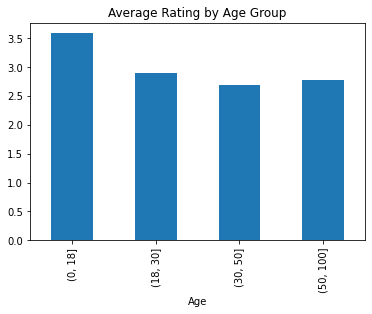

In [43]:
import matplotlib.pyplot as plt

# Merge ratings with user ages
age_ratings = pd.merge(
    ratings_df[['User-ID', 'Book-Rating']],
    users_df[['User-ID', 'Age']],
    on='User-ID',
    how='inner'
)

# Plot average rating by age group
age_ratings.groupby(pd.cut(age_ratings['Age'], bins=[0, 18, 30, 50, 100]))['Book-Rating'].mean().plot(kind='bar')
plt.title('Average Rating by Age Group')



# Drop rows where age is missing for correlation analysis
age_ratings_clean = age_ratings.dropna(subset=['Age'])
print(f"Available age-rating pairs: {len(age_ratings_clean):,}")

corr = age_ratings_clean[['Age', 'Book-Rating']].corr(method='pearson')
print("Pearson Correlation Matrix:")
display(corr)

#### Age Data Handling Decision
- **Missing**: 110,762/278,858 (39.7%)
- **Action**: Dropped column due to:
  1. Insignificant  negative correlation with ratings (r =-0.028238)
  2. Avoid imputation bias

In [44]:
#drop column and verify
users_df = users_df.drop(columns= ['Age'])
users_df.columns

Index(['User-ID', 'Location'], dtype='object')

### 3.1.2 Handling Duplicates

- For this we shall check dataframes individually since some have some unique identifiers
#### `books_df`

In [45]:
#check duplicates
display(books_df['ISBN'].duplicated().sum())

0

- `books_df` has no duplicates
#### `ratings_df`


In [46]:
#check duplicates
display(ratings_df[['ISBN','User-ID']].duplicated().sum())

0

- `ratings_df` has no duplicates either
#### `users_df`


In [47]:
#check duplicates
display(users_df['User-ID'].duplicated().sum())

0

- `users_df` has no duplicates either.
- Thus, the datasets have no duplicates
- Data Cleaning is complete, there is no need to check for outliers in this project since `Age`column has already been dropped.

## 3.3 Dataset Merging